# LSTM Presentation
---

### Contents:
1. Background
  + sigmoid
  + hyperbolic tangent
  + hadamard product
  + convolution
2. Recurrent Neural Networks
3. LSTM
4. ConvLSTM

In [2]:
#imports
import torch
from torch import nn
from torchviz import make_dot
import matplotlib.pyplot as plt

## Sigmoid

In [4]:
x = [torch.tensor(i) for i in range(-10, 10)]
y = [torch.sigmoid(i) for i in x]

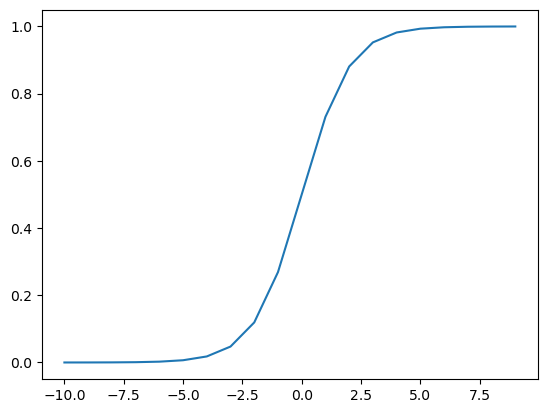

In [5]:
plt.plot(x, y)

## Hyperbolic Tangent

In [6]:
x_1 = [torch.tensor(i) for i in range(-10, 10)]
y_1 = [torch.tanh(i) for i in x]

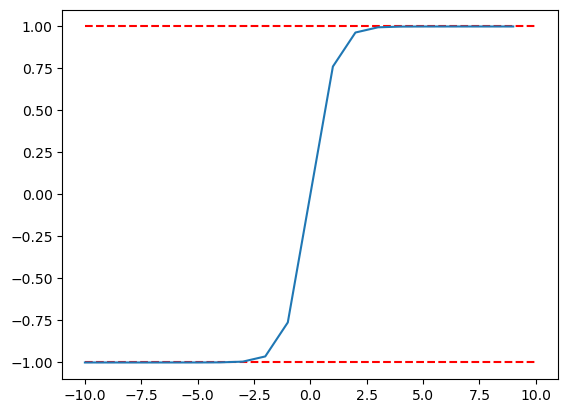

In [12]:
plt.hlines([1, -1], -10, 10, ['red'], 'dashed')
plt.plot(x_1, y_1)

## Hadamard Product

Also known as "naive matrix multiplication"
+ requires the same shape for both operand matrices
+ notation: $\odot$

Can be defined as $\forall i \in A \forall j \in Ai: A \odot B = A_{ij} \times B_{ij}$

## Convolutions

Advantages for images:
+ uses less connections than dense neural network, while accessing the same information with multiple layers.
+ in dense neural network, the image is flattened thereby removing the connection between most adjacent pixels.

### Elman or Jordan Networks (aka Simple RNN)

$h_t = tanh(W_hx_t + U_hh_{t-1} + b_h)$

$y_t = W_yh_t + b_y$

In [3]:
class RNNCell(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int, batch_size: int):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.i2h = nn.Linear(input_size, hidden_size, bias=False)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden_state) -> tuple[torch.Tensor, torch.Tensor]:
        x = self.i2h(x)
        hidden_state = self.h2h(hidden_state)
        hidden_state = torch.tanh(x + hidden_state)
        out = self.h2o(hidden_state)
        return out, hidden_state

In [11]:
rnn = RNNCell(10, 64, 10, 1)

x = torch.randn((10))
hidden_state = torch.zeros(64)

output, state = rnn(x, hidden_state)

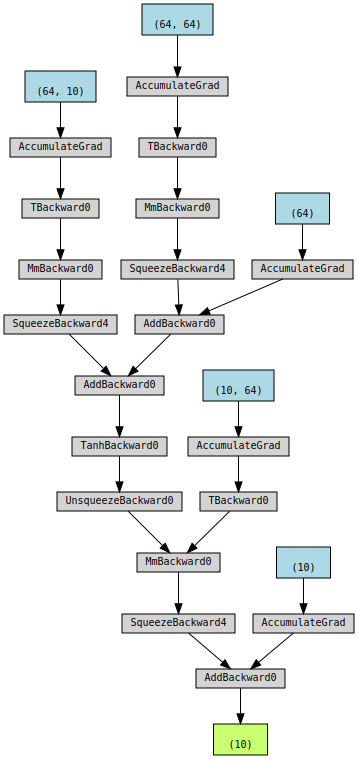

In [19]:
make_dot(output)

## LSTM

$f_t = \sigma_g(W_fx_t + U_fh_{t-1} + b_f)$

$i_t = \sigma_g(W_ix_t + U_ih_{t-1} + b_i)$

$o_t = \sigma_g(W_ox_t + U_oh_{t-1} + b_o)$

$\tilde{c}_t = \sigma_c(W_cx_t + U_ch_{t-1} + b_c)$

$c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$

$h_t = o_t \odot \sigma_h(c_t)$

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
      super().__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size

      # i_t
      self.U_i = nn.Parameter(torch.Tensor(input_size, hidden_size))
      self.V_i = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
      self.b_i = nn.Parameter(torch.Tensor(hidden_size))

      # f_t
      self.U_f = nn.Parameter(torch.Tensor(input_size, hidden_size))
      self.V_f = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
      self.b_f = nn.Parameter(torch.Tensor(hidden_size))

      # c_t
      self.U_c = nn.Parameter(torch.Tensor(input_size, hidden_size))
      self.V_c = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
      self.b_c = nn.Parameter(torch.Tensor(hidden_size))

      # o_t
      self.U_o = nn.Parameter(torch.Tensor(input_size, hidden_size))
      self.V_o = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
      self.b_o = nn.Parameter(torch.Tensor(hidden_size))



    def forward(self, x, hidden_state):
      short, long = hidden_state

      i_t = torch.sigmoid(x @ self.U_i + h_t @ self.V_i + self.b_i)
      f_t = torch.sigmoid(x @ self.U_f + h_t @ self.V_f + self.b_f)
      g_t = torch.tanh(x @ self.U_c + h_t @ self.V_c + self.b_c)
      o_t = torch.sigmoid(x @ self.U_o + h_t @ self.V_o + self.b_o)
      c_t = f_t * long + i_t * g_t
      h_t = o_t * torch.tanh(c_t)
      
      return h_t, c_t
    

## ConvLSTM

$i_{t} = \sigma\left(W_{xi} ∗ X_{t} + W_{hi} ∗ H_{t−1} + W_{ci} \odot \mathcal{C}_{t−1} + b_{i}\right)$

$f_{t} = \sigma\left(W_{xf} ∗ X_{t} + W_{hf} ∗ H_{t−1} + W_{cf} \odot \mathcal{C}_{t−1} + b_{f}\right)$

$\mathcal{C}_{t} = f_{t} \odot \mathcal{C}_{t−1} + i_{t} \odot \text{tanh}\left(W_{xc} ∗ X_{t} + W_{hc} ∗ \mathcal{H}_{t−1} + b_{c}\right)$

$o_{t} = \sigma\left(W_{xo} ∗ X_{t} + W_{ho} ∗ \mathcal{H}_{t−1} + W_{co} \odot \mathcal{C}_{t} + b_{o}\right)$

$ \mathcal{H}_{t} = o_{t} \odot \text{tanh}\left(C_{t}\right) $
